In [64]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import sympy as sym
import scipy as sp
from IPython.display import display, Math
import sympy.plotting.plot as symplot
from functools import reduce
import math
import random

### Summation and products

In [3]:
lst = [1,3,4,1,6]
sum(lst)

15

In [4]:
np.sum(lst)

15

In [5]:
np.prod(lst)

72

In [6]:
#using reduce
reduce(lambda x1,x2: x1*x2, lst)

72

Accumulative Sum

In [7]:
np.cumsum(lst)

array([ 1,  4,  8,  9, 15])

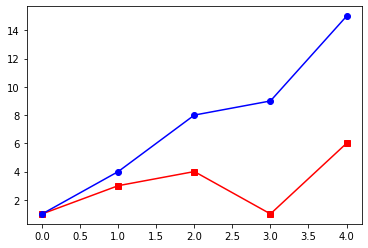

In [8]:


plt.plot(lst, "rs-")
plt.plot(np.cumsum(lst), "bo-")

plt.show()

### Exercises

In [9]:
#summation
a = np.arange(1,6)
suma = np.sum(a)
sumb = np.sum(a**2)

display(Math("$$\\frac{\sum_{}{} a}{\sum_{}{} a^2} = " \
             "\\frac{1}{\sum_{}{} a}$$"))
suma/sumb == 1/suma

<IPython.core.display.Math object>

False

In [10]:
#product
prod1 = np.prod(a)
prod2 = np.prod(a**2)

display(Math("$$\\frac{\prod_{}{} a}{\prod_{}{} a^2} = " \
             "\\frac{1}{\prod_{}{} a}$$"))
prod1/prod2 == 1/prod1

<IPython.core.display.Math object>

True

### Differences
Discrete difference operator

In [11]:
x = [1,2,4]
x[1] - x[0]

1

In [13]:
x = np.array([1,3,4,10,-4])
np.diff(x)

array([  2,   1,   6, -14])

In [14]:
v=np.arange(0,10)
np.diff(v)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
#differences of differences
np.diff(x, 2)

array([ -1,   5, -20])

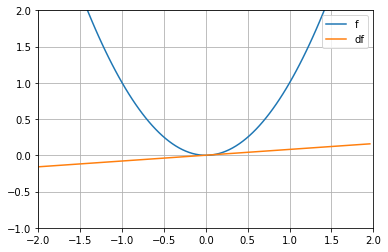

In [38]:
x = np.linspace(-2,2,101)
f = x ** 2
df = np.diff(f)
plt.plot(x,f, label='f')
plt.plot(x[0:-1], df, label='df')
plt.grid()
plt.axis([-2,2,-1,2])
plt.legend()
plt.show()

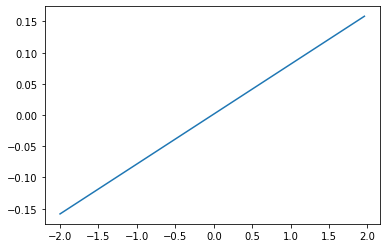

In [35]:
plt.plot(x[:-1], df)


### Roots of Polynomials
Solve the polynomial for x

In [40]:
## the polynomial
# 3X² + 2x + 1

In [43]:
#define the coefficients
#be aware of the order
coeffs = [3,2,-1]
roots = np.roots(coeffs)
print(roots)

[-1.          0.33333333]


In [47]:
x = sym.symbols("x")
pn = 3*x**2 + 2*x -1
for i in roots:
    display(Math("\\text{At }x=%g, \\quad %s = %g" % (i, sym.latex(pn), pn.subs(x,i))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

−5.55112𝑒−17 this is praticaly 0.

In [48]:
#generate a degreeN polynomial and count the number of roots

In [60]:
for i in range(1,11):
    coeffs = np.arange(1,i+1)
    print("A degree-%s polynomial has %s roots" %(len(coeffs)-1, 
                                                   len(np.roots(coeffs))))

A degree-0 polynomial has 0 roots
A degree-1 polynomial has 1 roots
A degree-2 polynomial has 2 roots
A degree-3 polynomial has 3 roots
A degree-4 polynomial has 4 roots
A degree-5 polynomial has 5 roots
A degree-6 polynomial has 6 roots
A degree-7 polynomial has 7 roots
A degree-8 polynomial has 8 roots
A degree-9 polynomial has 9 roots


### The quadratic equation

In [70]:
a = 4
b = 7
c = 5

quadA1 = (-b + sp.sqrt(b**2 - 4*a*c)) / (2*a)
quadA2 = (-b - sp.sqrt(b**2 - 4*a*c)) / (2*a)

print(quadA1, quadA2)

(-0.875+0.6959705453537527j) (-0.875-0.6959705453537527j)


In [72]:
def return_quadeq(a,b,c):
    
    out = sp.zeros(2)
    
    out[0] = (-b + sp.sqrt(b**2 - 4*a*c)) / (2*a)
    out[1] = (-b - sp.sqrt(b**2 - 4*a*c)) / (2*a)
    return out
    

In [74]:
return_quadeq(2,7,5)

array([-1. , -2.5])

/home/serra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/home/serra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
No handles with labels found to put in legend.


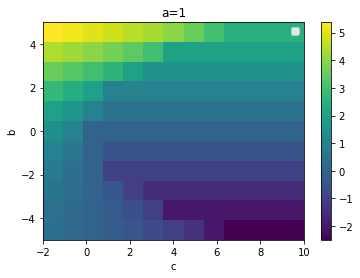

In [100]:
a = 1
b = np.arange(-5,6)
c = np.arange(-2,11)

M = np.zeros([len(b), len(c)])

for i in range(0, len(b)):
    for j in range(0, len(c)):
        ans = return_quadeq(a,b[i], c[j])
        M[i,j] = ans[0]

plt.imshow(M, extent=[ c[0], c[-1], b[0], b[-1] ])
plt.xlabel("c")
plt.ylabel("b")
plt.title(f"a={str(a)}")
plt.legend()
plt.colorbar()
plt.show()

### Complex Numbers

In [104]:
print(1j)
print(sp.sqrt(-1))
print(np.sqrt(-1, dtype="complex"))

1j
1j
1j


In [107]:
real_part = 4
img_part = -5

cn1 = np.complex(real_part, img_part)
cn2 = real_part + 1j*img_part

print(cn1)
print(cn2)

(4-5j)
(4-5j)


In [108]:
z1 = np.complex(4,5)
z2 = np.complex(2,3)

z1+z2

(6+8j)

In [ ]:
z1.

In [111]:
w = np.complex(2,4)
z = np.complex(5,6)

w + z == np.complex(w.real + z.real, w.imag+z.imag)

True

In [114]:
sym.sympify(w*z)

-14.0 + 32.0*I

In [116]:
a,b = sym.symbols("a,b", real=True)
z = a + b*sym.I
sym.conjugate(z)

a - I*b

In [120]:
Math("z\\times z^* = %s" % sym.latex(sym.expand(z * sym.conjugate(z))))

<IPython.core.display.Math object>

### Division of Complex Numbers

In [135]:
z = np.complex(4, 2)
w = np.complex(2, -3)

display(Math("\\frac{%s}{%s} = %s" %(z, w, w/z)))
display(Math("\\frac{%s}{%s} = " \
             "\\frac{%s\\times %s}{%s\\times %s} = " \
             "%s" \
             %(z, w,z,np.conj(w),w, np.conj(w), 
               w/z)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [145]:
z = np.complex(8,2)
w = np.complex(2,3)

eq = (((z - 1)*(z*w + w))/(w*z - w)) * \
     ((w-1)*(1-w)/(-z*w**2 - w**2 + 2*w*z + 2*w -z -1))

print(eq)

(1.0000000000000002+8.326672684688674e-17j)


### Graphing complex numbers

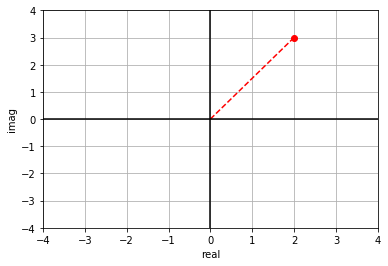

In [154]:
z = np.complex(2, 3)
plt.plot(z.real, z.imag, "ro")
plt.plot([0, z.real], [0,z.imag], "r--")

plt.xlabel("real")
plt.ylabel("imag")
plt.axhline(0, color="k")
plt.axvline(0, color="k")
plt.grid()
plt.axis([-4,4,-4,4])
plt.show()


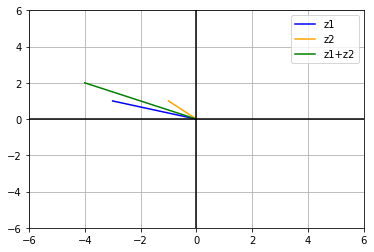

In [161]:

w = np.complex(-3, 1)
z = np.complex(-1, 1)
rs = w + z

plt.plot([0, w.real], [0,w.imag], "b", label="z1")
plt.plot([0, z.real], [0,z.imag], "orange", label="z2")
plt.plot([0, rs.real], [0 ,rs.imag], "g", label="z1+z2")

plt.axhline(0, color="k")
plt.axvline(0, color="k")
plt.legend()
plt.grid()
plt.axis([-6,6,-6,6])
plt.show()


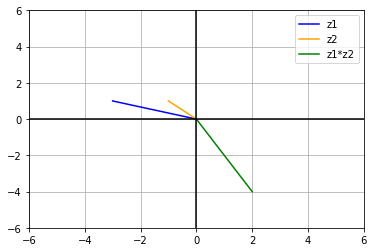

In [162]:

w = np.complex(-3, 1)
z = np.complex(-1, 1)
rs = w * z

plt.plot([0, w.real], [0,w.imag], "b", label="z1")
plt.plot([0, z.real], [0,z.imag], "orange", label="z2")
plt.plot([0, rs.real], [0 ,rs.imag], "g", label="z1*z2")

plt.axhline(0, color="k")
plt.axvline(0, color="k")
plt.legend()
plt.grid()
plt.axis([-6,6,-6,6])
plt.show()

### Revisiting quadratic equations

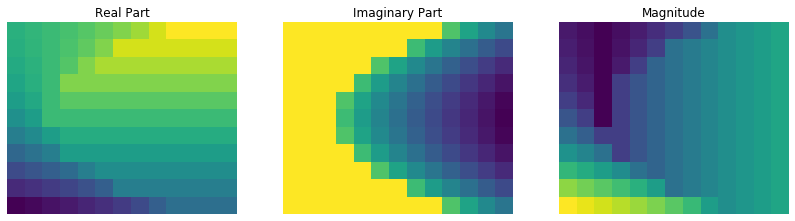

In [181]:
def return_quadeq(a,b,c):
    
    out = sp.zeros(2, dtype=complex)
    
    out[0] = (-b + sp.sqrt(b**2 - 4*a*c)) / (2*a)
    out[1] = (-b - sp.sqrt(b**2 - 4*a*c)) / (2*a)
    return out
    

a = 1
b = np.arange(-5,6)
c = np.arange(-2,11)

M = np.zeros([len(b), len(c)], dtype="complex")

for i in range(0, len(b)):
    for j in range(0, len(c)):
        ans = return_quadeq(a, b[i], c[j])
        M[i,j] = ans[1]

plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.imshow(np.real(M), extent=[ c[0], c[-1], b[0], b[-1] ])
plt.axis("off")
plt.title("Real Part")


plt.subplot(1,3,2)
plt.imshow(np.imag(M), extent=[ c[0], c[-1], b[0], b[-1] ])
plt.axis("off")
plt.title("Imaginary Part")

plt.subplot(1,3,3)
plt.imshow(np.absolute(M), extent=[ c[0], c[-1], b[0], b[-1] ])
plt.axis("off")
plt.title("Magnitude")

plt.show()